# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [55]:
# Start coding here...
# Import the following datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Data Validation
The dataset has 947 rows and 8 columns before cleaning and validation. All columns are just as described in the data dictionary:
- recipe: 947 numeric, unique values as unique identifiers of recipes without missing values or invalid values. No cleaning is needed.
- calories: 891 numeric values as numbers of calories with 52 missing values and 0 invalid values. Cleaning is needed to ensure handling of missing values. For each missing value, they need to be replaced with the mean number of calories by categories and servings rounded to 2 decimal places. 
- carbohydrate: 835 numeric values as numbers of calories with 52 missing values and 0 invalid values. Cleaning is needed to ensure handling of missing values. For each missing value, they need to be replaced with the mean number of carbohydrates by categories and servings rounded to 2 decimal places. 
- sugar: 666 numeric values as numbers of calories with 52 missing values and 0 invalid values. Cleaning is needed to ensure handling of missing values. For each missing value, they need to be replaced with the mean number of sugar by categories and servings rounded to 2 decimal places.
- protein: 772 numeric values as numbers of calories with 52 missing values and 0 invalid values. Cleaning is needed to ensure handling of missing values. For each missing value, they need to be replaced with the mean number of protein by categories and servings rounded to 2 decimal places.
- category: 11 character values as types of recipes without missing values or invalid values. But since there are 10 possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One
Dish Meal'), the column has 1 invalid value Chicken Breast. Cleaning is needed to ensure there are 10 distinct values without invalid values.
- servings: 6 numeric values as number of servings for the recipe without missing values but with 2 invalid values. Since we assume that the servings are numerical, the values '4 as a snack' and '6 as a snack' are considered invalid values so cleaning is needed to ensure that there are no rows with invalid values.
- high_traffic: 1 character value for checking if the traffic to the site was high when the recipe was shown with 373 missing values and 0 invalid values. Cleaning is needed to ensure handling of missing values. Since 'High' is the only character value, we would need to replace missing values with 'Low' for consistency.

In [56]:
# Import the dataset
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")
recipe_site_traffic.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [57]:
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [58]:
recipe_site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [59]:
# Check the category column for missing values or invalid values
print(recipe_site_traffic['category'].value_counts())
print(recipe_site_traffic['category'].nunique())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
11


In [60]:
print(recipe_site_traffic['category'].isna().sum())

0


In [61]:
# Clean category column to ensure only 10 unique values by manipulating strings
recipe_site_traffic.loc[recipe_site_traffic['category'] == 'Chicken Breast', 'category'] = 'Chicken'
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')
print(recipe_site_traffic['category'].value_counts())
print(recipe_site_traffic['category'].nunique())

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64
10


In [62]:
# Check the servings column for missing values or invalid values
print(recipe_site_traffic['servings'].value_counts())
print(recipe_site_traffic['servings'].nunique())

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
6


In [63]:
print(recipe_site_traffic['servings'].isna().sum())

0


In [64]:
# Clean servings column to ensure only numerical values by manipulating strings
recipe_site_traffic.loc[recipe_site_traffic['servings'] == '4 as a snack', 'servings'] = '4'
recipe_site_traffic.loc[recipe_site_traffic['servings'] == '6 as a snack', 'servings'] = '6'
recipe_site_traffic['servings'] = pd.to_numeric(recipe_site_traffic['servings'], errors='coerce')
print(recipe_site_traffic['servings'].value_counts())
print(recipe_site_traffic['servings'].nunique())

4    391
6    198
2    183
1    175
Name: servings, dtype: int64
4


In [65]:
# Check the high_traffic column for missing values or invalid values
print(recipe_site_traffic['high_traffic'].value_counts())
print(recipe_site_traffic['high_traffic'].nunique())

High    574
Name: high_traffic, dtype: int64
1


In [66]:
print(recipe_site_traffic['high_traffic'].isna().sum())

373


In [67]:
# Clean high_traffic column to ensure there are no missing values by manipulating strings
recipe_site_traffic['high_traffic'].fillna('Low', inplace=True)
recipe_site_traffic['high_traffic'] = recipe_site_traffic['high_traffic'].astype('category')
print(recipe_site_traffic['high_traffic'].value_counts())
print(recipe_site_traffic['high_traffic'].nunique())

High    574
Low     373
Name: high_traffic, dtype: int64
2


In [68]:
# Check the calories column for missing values or invalid values
print(recipe_site_traffic['calories'].value_counts())
print(recipe_site_traffic['calories'].nunique())

47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 891, dtype: int64
891


In [69]:
print(recipe_site_traffic['calories'].isna().sum())

52


In [70]:
# Replace the missing values in the calories column with the mean number of calories by categories and servings
recipe_site_traffic['calories'] = recipe_site_traffic['calories'].fillna(recipe_site_traffic.groupby(['category', 'servings'])['calories'].transform('mean').round(2))
print(recipe_site_traffic['calories'].value_counts())

764.64    6
461.16    5
575.86    4
578.69    4
247.72    3
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 915, dtype: int64


In [71]:
print(recipe_site_traffic['calories'].isna().sum())

0


In [72]:
# Check the carbohydrate column for missing values or invalid values
print(recipe_site_traffic['carbohydrate'].value_counts())
print(recipe_site_traffic['carbohydrate'].nunique())

3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 835, dtype: int64
835


In [73]:
print(recipe_site_traffic['carbohydrate'].isna().sum())

52


In [74]:
# Replace the missing values in the carbohydrate column with the mean number of carbohydrates by categories and servings
recipe_site_traffic['carbohydrate'] = recipe_site_traffic['carbohydrate'].fillna(recipe_site_traffic.groupby(['category', 'servings'])['carbohydrate'].transform('mean').round(2))
print(recipe_site_traffic['carbohydrate'].value_counts())

20.07    6
39.24    5
25.28    4
29.09    4
19.03    4
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 856, dtype: int64


In [75]:
print(recipe_site_traffic['carbohydrate'].isna().sum())

0


In [76]:
# Check the sugar column for missing values or invalid values
print(recipe_site_traffic['sugar'].value_counts())
print(recipe_site_traffic['sugar'].nunique())

1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: sugar, Length: 666, dtype: int64
666


In [77]:
print(recipe_site_traffic['sugar'].isna().sum())

52


In [78]:
# Replace the missing values in the sugar column with the mean number of sugar by categories and servings
recipe_site_traffic['sugar'] = recipe_site_traffic['sugar'].fillna(recipe_site_traffic.groupby(['category', 'servings'])['sugar'].transform('mean').round(2))
print(recipe_site_traffic['sugar'].value_counts())

7.01    6
2.97    6
1.62    5
7.26    5
6.13    5
       ..
8.54    1
4.69    1
9.46    1
6.12    1
6.20    1
Name: sugar, Length: 679, dtype: int64


In [79]:
print(recipe_site_traffic['sugar'].isna().sum())

0


In [80]:
# Check the protein column for missing values or invalid values
print(recipe_site_traffic['protein'].value_counts())
print(recipe_site_traffic['protein'].nunique())

0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: protein, Length: 772, dtype: int64
772


In [81]:
print(recipe_site_traffic['protein'].isna().sum())

52


In [82]:
# Replace the missing values in the protein column with the mean number of protein by categories and servings
recipe_site_traffic['protein'] = recipe_site_traffic['protein'].fillna(recipe_site_traffic.groupby(['category', 'servings'])['protein'].transform('mean').round(2))
print(recipe_site_traffic['protein'].value_counts())

66.53     6
0.36      6
19.69     5
0.02      4
0.93      4
         ..
14.14     1
15.08     1
125.66    1
23.14     1
8.07      1
Name: protein, Length: 791, dtype: int64


In [83]:
print(recipe_site_traffic['protein'].isna().sum())

0


In [84]:
# Check for duplicated rows
duplicate_rows = recipe_site_traffic[recipe_site_traffic.duplicated()]
duplicate_rows

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [85]:
# Drop duplicate rows
recipe_site_traffic.drop_duplicates(inplace=True)
duplicate_rows = recipe_site_traffic[recipe_site_traffic.duplicated()]
duplicate_rows

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [86]:
recipe_site_traffic.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.64,20.07,7.01,66.53,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


In [87]:
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 54.1 KB


In [88]:
recipe_site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,439.825702,35.121911,9.064498,24.577402,3.477297
std,273.519652,442.246014,42.905695,14.447589,35.764049,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,2.000000
50%,474.000000,306.900000,22.330000,4.930000,11.240000,4.000000
75%,710.500000,594.475000,44.740000,9.565000,32.360000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


After cleaning and validating the data, the dataset contains 947 rows and 8 columns without missing values or invalid values.

## Exploratory Analysis
During analysis of the data, I investigated the target variable and the features of the recipes as well as the relationships between the target variable and the features.

### Target Variable - Traffic
Since we need to choose a recipe based on traffic, we choose traffic as the target variable. From the countplot below, we can see an unbalanced dataset with the distribution of the High traffic being greater than the distribution of the Low traffic.

[Text(0.5, 1.0, 'Distribution of Target Variable - Traffic')]

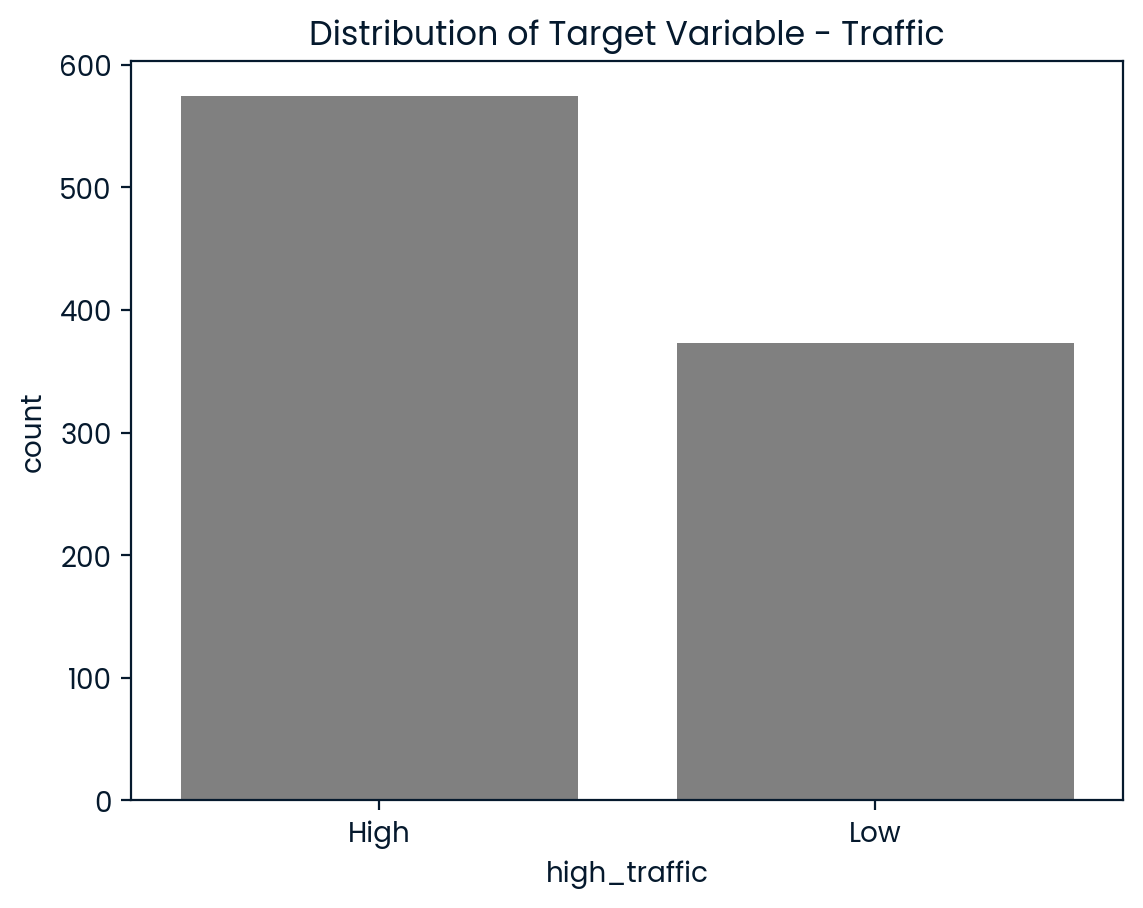

In [89]:
# Create a countplot to show the distribution of traffic.
sns.countplot(x=recipe_site_traffic['high_traffic'], color='gray', order=recipe_site_traffic['high_traffic'].value_counts().index).set(title='Distribution of Target Variable - Traffic')

### Numeric Variables - Calories, Carbohydrates, Sugar, and Protein
From the heatmap below, we can conclude that there is a weak linear positive relationship between calories and protein and a very weak linear relationship between sugar and protein.

[Text(0.5, 1.0, 'Correlation Heatmap between Numeric Variables')]

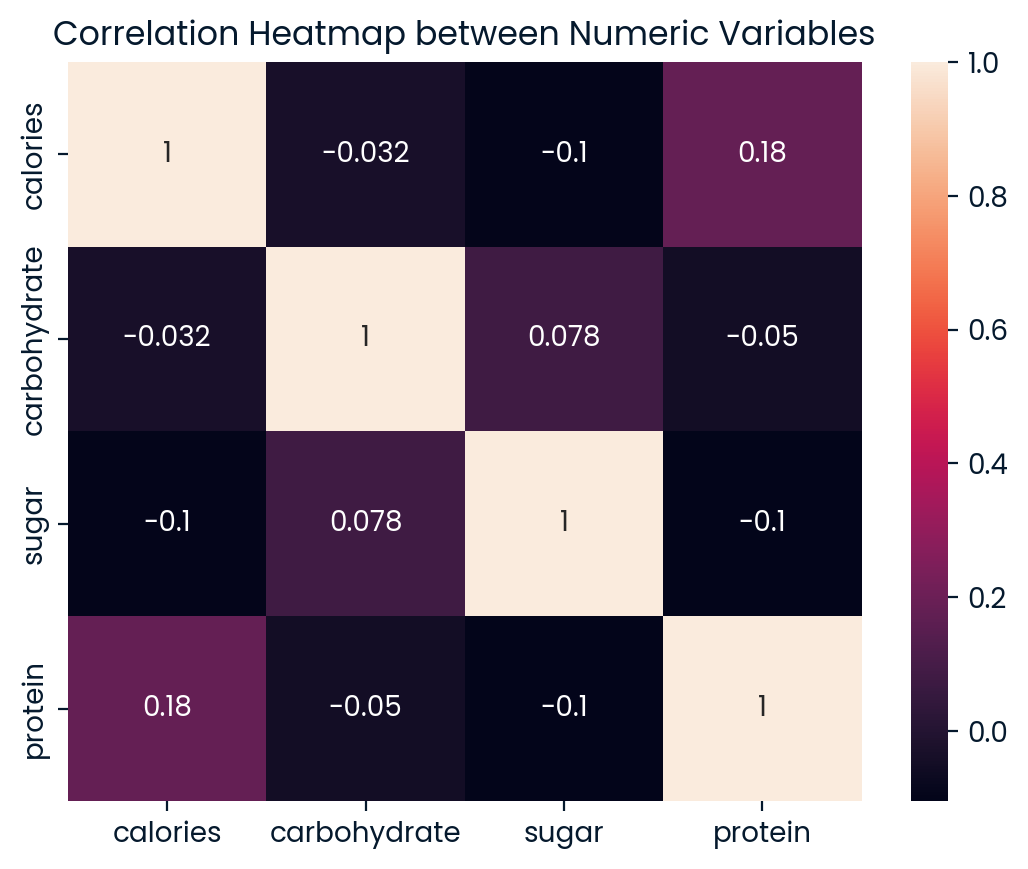

In [90]:
# Create a heatmap to show a relationship between numeric variables.
numeric_data = recipe_site_traffic.select_dtypes(include=['float'])
sns.heatmap(numeric_data.corr(), annot=True).set(title='Correlation Heatmap between Numeric Variables')

**Relationship between calories, carbohydrates, sugar, protein, and traffic**

To find the non-linear relationship between the target variable and the numerical variables, I used boxplots to further investigate the relationship between calories, carbohydrates, sugar, protein, and the target variable which is traffic. From the boxplots below, we saw that the site for the recipe with high traffic shows more calories, more carbohydrates, and more protein compared to the site for the recipe with low traffic which shows less traffic. We can conclude that more people prefer food with less sugar.

[Text(0.5, 1.0, 'Traffic vs Protein')]

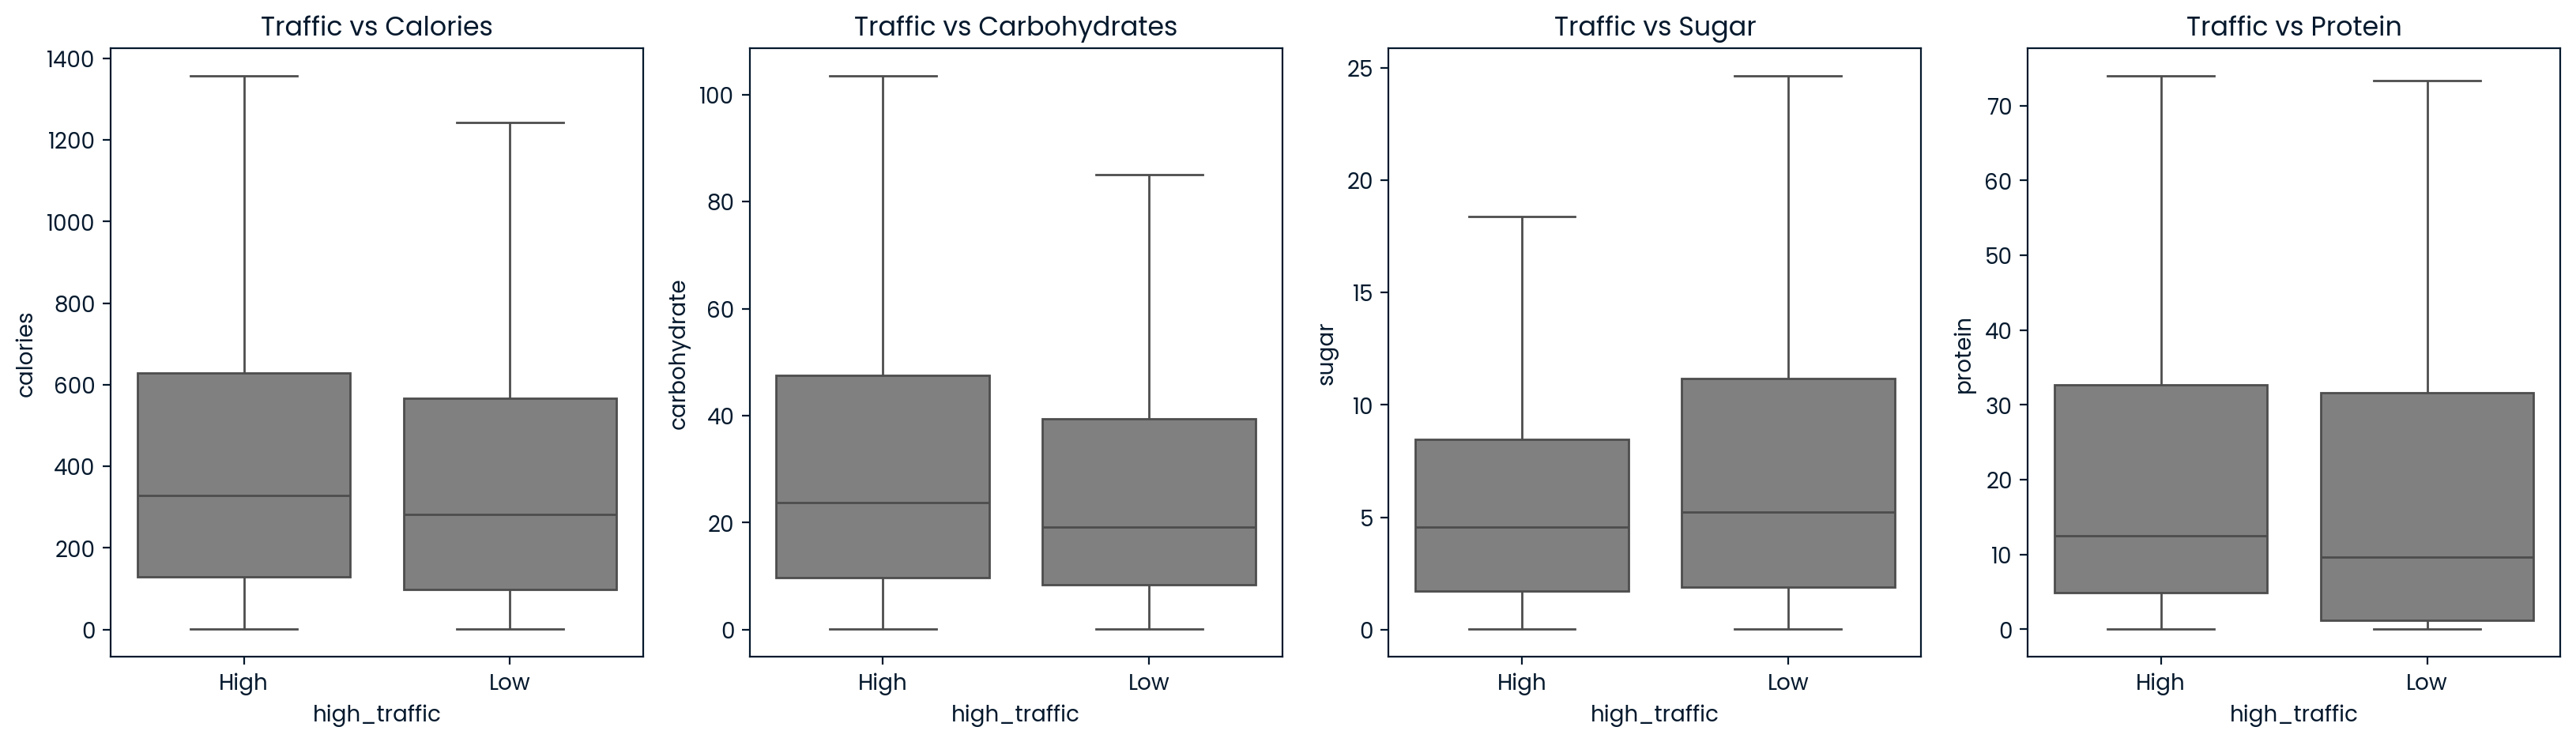

In [91]:
# Create boxplots to show the relationship between the target variable and the numerical variables.
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='high_traffic', y='calories', data=recipe_site_traffic, color='gray', ax=axes[0], showfliers=0, order=recipe_site_traffic['high_traffic'].value_counts().index).set(title='Traffic vs Calories')
sns.boxplot(x='high_traffic', y='carbohydrate', data=recipe_site_traffic, color='gray', ax=axes[1], showfliers=0, order=recipe_site_traffic['high_traffic'].value_counts().index).set(title='Traffic vs Carbohydrates')
sns.boxplot(x='high_traffic', y='sugar', data=recipe_site_traffic, color='gray', ax=axes[2], showfliers=0, order=recipe_site_traffic['high_traffic'].value_counts().index).set(title='Traffic vs Sugar')
sns.boxplot(x='high_traffic', y='protein', data=recipe_site_traffic, color='gray', ax=axes[3], showfliers=0, order=recipe_site_traffic['high_traffic'].value_counts().index).set(title='Traffic vs Protein')

### Categorical Variables - Category, Servings
**Characteristics about Category**

Since category is mostly related to traffic, I checked the characteristics of it. From the countplot below, the most common category of recipe is chicken.

[Text(0.5, 1.0, 'Count of Categories')]

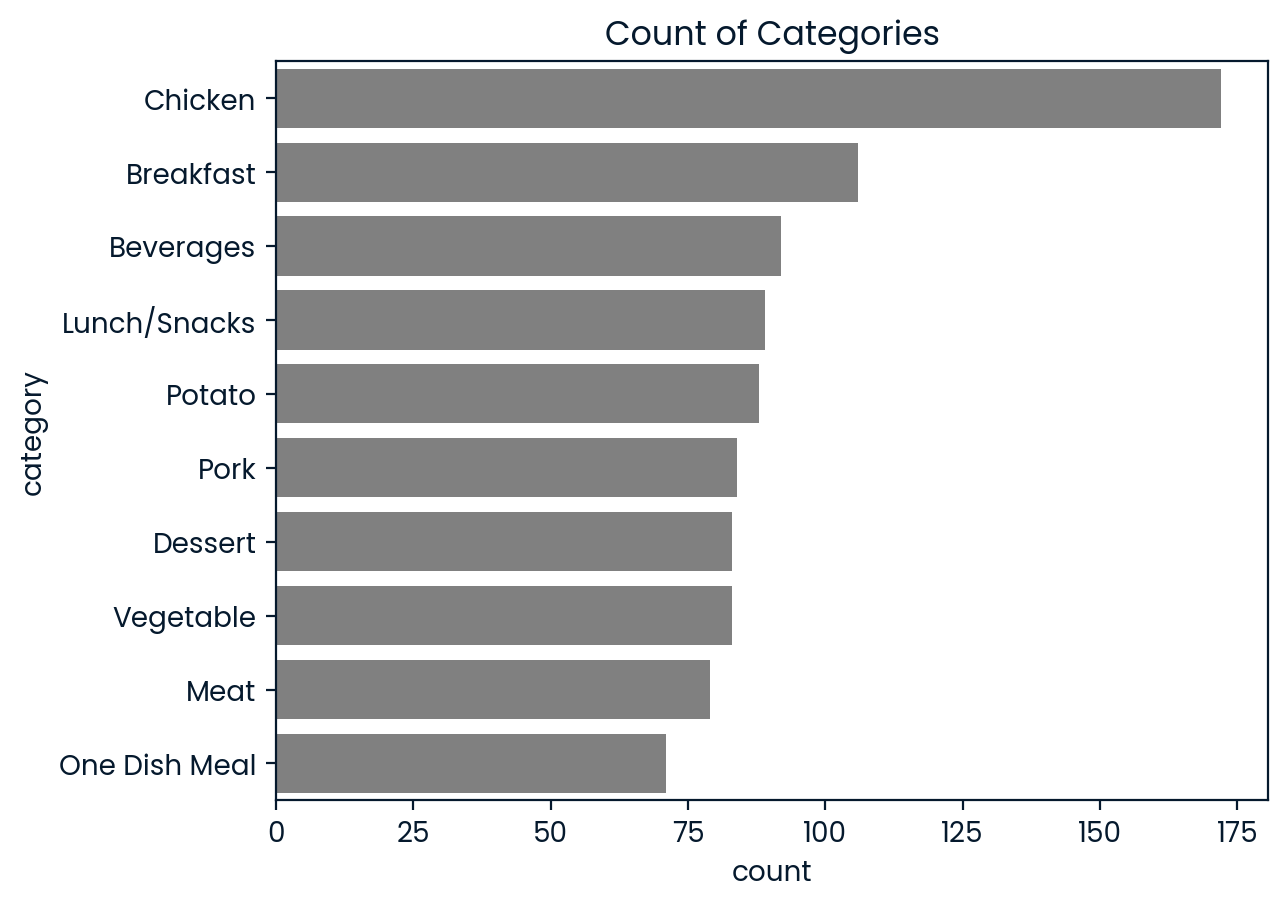

In [92]:
# Create a countplot to visualize the distribution of category.
sns.countplot(y=recipe_site_traffic['category'], color='gray', order=recipe_site_traffic['category'].value_counts().index).set(title='Count of Categories')

**Characteristics about Servings**

Despite servings being a numerical variable, we'll assume that it is a category since it has 4 possible values. From the countplot below, the most common number of servings is 4.

[Text(0.5, 1.0, 'Count of Servings')]

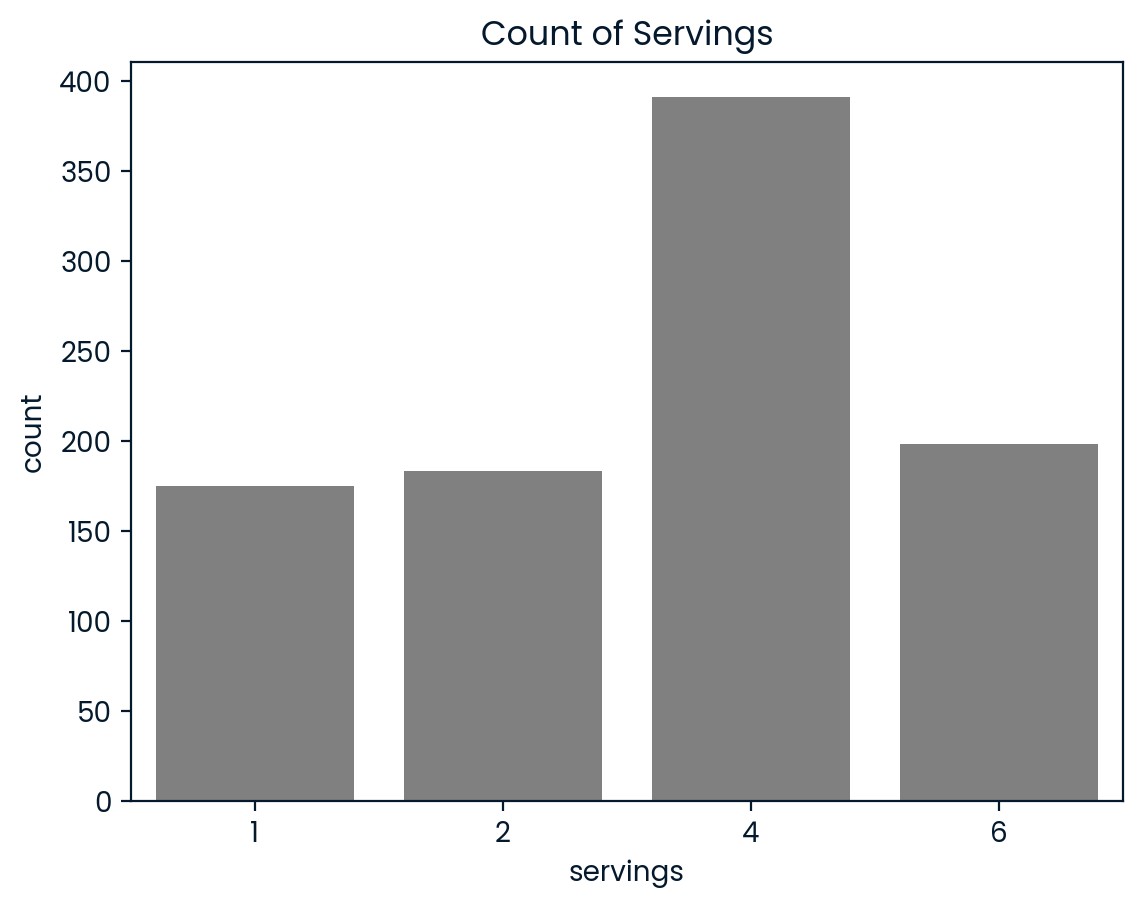

In [93]:
# Create a countplot to visualize the distribution of servings.
sns.countplot(x=recipe_site_traffic['servings'], color='gray').set(title='Count of Servings')

**Relationships between Category, Servings, and Traffic**

I also investigated the relationships between category, servings, and traffic. From the countplots below, we found the difference in traffic for each category and serving. We can conclude that in terms of traffic, the most common categories are Pork, Potato, and Vegetable, and the most common servings is 4. On the other hand, the least common category is Beverages since not all people prefer beverages.

[Text(0.5, 1.0, 'Distribution of Servings by Traffic')]

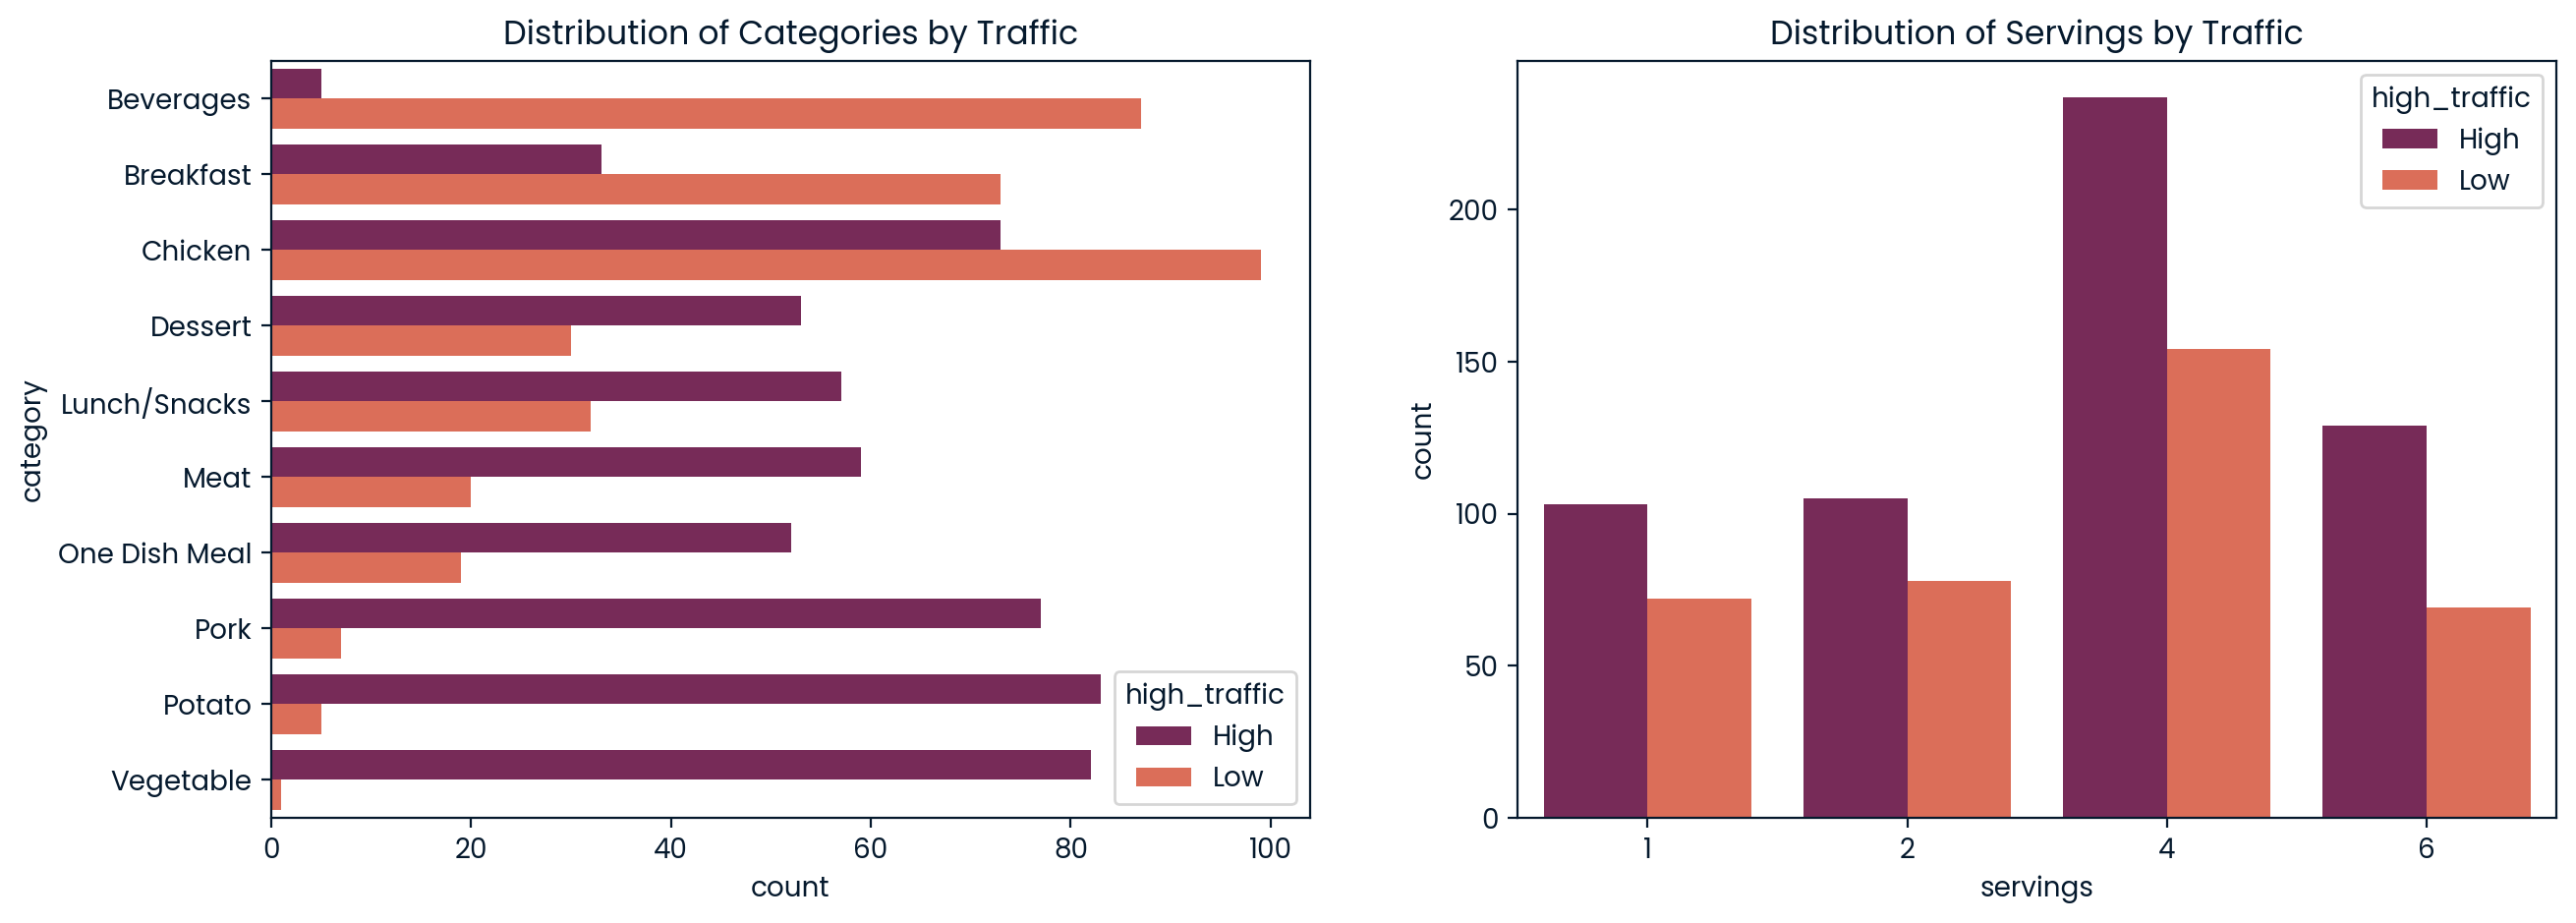

In [94]:
# Create barplots to show the relationships between category, servings, and traffic
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(y='category', data=recipe_site_traffic, color='gray', ax=axes[0], hue='high_traffic', palette='rocket').set(title='Distribution of Categories by Traffic')
sns.countplot(x='servings', data=recipe_site_traffic, color='gray', ax=axes[1], hue='high_traffic', palette='rocket').set(title='Distribution of Servings by Traffic')

## Model Development
Predicting recipes with high traffic is a binary classification problem in machine learning. For that, we would need to use baseline and comparison models to predict recipes with high traffic. I choose the Logistic Regression model as the baseline model because of its simple and interpretable usage for binary classification tasks. As for the comparison model, I choose the Random Forest model for comparison because it can handle non-linear relationships and missing data effectively, and is robust to overfitting with proper tuning.

### Prepare for Modeling
To enable modeling, I choose calories, carbohydrates, sugar, protein, category, and servings as features, and traffic as the target variable. I also made the following changes:
- Encode categorical features into numerical features
- Normalize or scale numerical features
- Split data into a training set and testing set

In [95]:
# Encode categorical features into numerical features
encoded_data = pd.get_dummies(recipe_site_traffic['category'])

In [96]:
# Normalize or scale the numerical features.
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']
numerical_data = recipe_site_traffic[numerical_columns]
pt = PowerTransformer()
scaled_values = pt.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_values, columns=numerical_columns)
scaled_data['servings'] = recipe_site_traffic['servings']

In [97]:
# Get the features and target variable
encoded_scaled_data = pd.concat([scaled_data, encoded_data], axis=1)
encoded_scaled_data['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == 'High', True, False)

# Features
X = encoded_scaled_data.drop(columns=['high_traffic'], axis=1)

# Target variable
y = encoded_scaled_data['high_traffic']

In [98]:
# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Evaluation
For evaluation, I choose **Precision**, **F1-Score** and **ROC-AUC (Area under the ROC curve)** as metrics to evaluate the model since both models are for binary classification. Precision measures how many of the positives are actually true. F1-Score measures the harmonic mean of precision and recall. And ROC-AUC evaluates models' abilities to distinguish between classes across all thresholds. In this case, the positives is high traffic recipes.

### Logistic Regression Model

In [99]:
# Fit the logistic regression model to the data
logreg = LogisticRegression(multi_class = 'auto')
logreg.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Make predictions from the logistic regression model
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:,1]

# Calculate the accuracy score, precision score, recall score, F1 score, ROC-AUC score, and confusion matrix for the Logistic Regression model.
logreg_accuracy_score = accuracy_score(y_test, y_pred_logreg)
logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)
logreg_f1_score = f1_score(y_test, y_pred_logreg)
logreg_roc_auc_score = roc_auc_score(y_test, y_prob_logreg)
print("Logistic Regression Accuracy Score:", logreg_accuracy_score)
print("Logistic Regression Precision Score:", logreg_precision_score)
print("Logistic Regression Recall Score:", logreg_recall_score)
print("Logistic Regression F1-Score:", logreg_f1_score)
print("Logistic Regression ROC-AUC Score:", logreg_roc_auc_score)
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy Score: 0.7789473684210526
Logistic Regression Precision Score: 0.8476190476190476
Logistic Regression Recall Score: 0.7739130434782608
Logistic Regression F1-Score: 0.8090909090909091
Logistic Regression ROC-AUC Score: 0.8681739130434784
[[59 16]
 [26 89]]


**Finding the best parameters for Logistic Regression Model**

In [101]:
# Get the best parameters for the Logistic Regression model
logreg_build = LogisticRegression()
param_dist_log_reg = {
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': ['balanced', None],
}

rand_search_log_reg = RandomizedSearchCV(logreg_build, param_distributions=param_dist_log_reg, cv=5, random_state=42)
rand_search_log_reg.fit(X_train, y_train)

hyper_params_log_reg = rand_search_log_reg.best_params_
print("Best Parameters for Logistic Regression:", hyper_params_log_reg)

Best Parameters for Logistic Regression: {'multi_class': 'auto', 'class_weight': None}


**Finding the important feature in Logistic Regression Model**

Text(0.5, 1.0, 'Feature Importance in Logistic Regression Model')

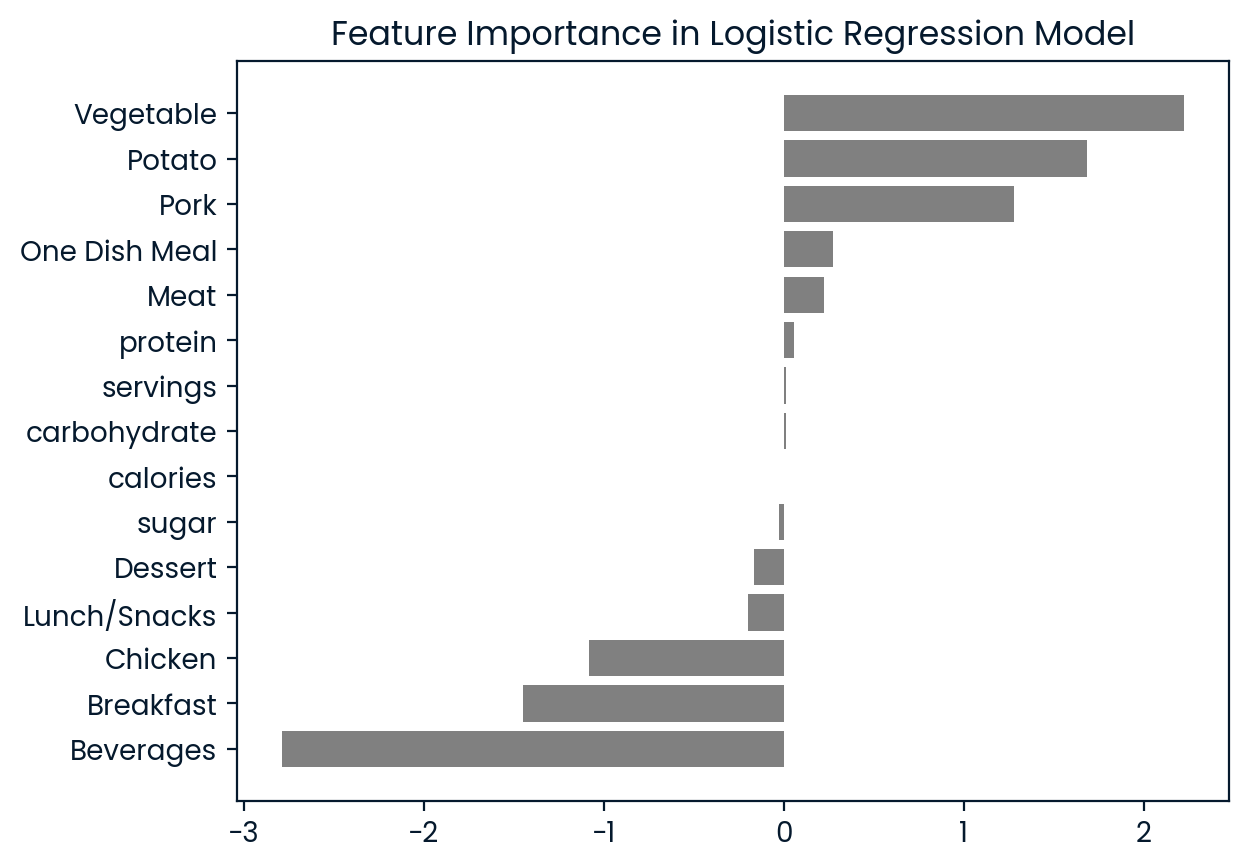

In [102]:
# Create a barplot to find the important feature in Logistic Regression Model.
feature_columns = X.columns.to_list()
logreg_results = {}
for i in range(len(feature_columns)):
    logreg_results[feature_columns[i]] = logreg.coef_[0][i]

logreg_results = dict(sorted(logreg_results.items(), key=lambda item: item[1]))
plt.barh(list(logreg_results.keys()), list(logreg_results.values()), color='gray')
plt.title('Feature Importance in Logistic Regression Model')

### Random Forest Classifier Model

In [103]:
# Fit the random forest model to the data
rfc = RandomForestClassifier(n_estimators=33, min_samples_split=6, max_depth=49, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=49, min_samples_split=6, n_estimators=33,
                       random_state=42)

In [104]:
# Make predictions from the random forest model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:,1]

# Calculate the accuracy score, precision score, recall score, F1 score, ROC-AUC score, and confusion matrix for the Random Forest Classifier model.
rfc_accuracy_score = accuracy_score(y_test, y_pred_rfc)
rfc_precision_score = precision_score(y_test, y_pred_rfc)
rfc_recall_score = recall_score(y_test, y_pred_rfc)
rfc_f1_score = f1_score(y_test, y_pred_rfc)
rfc_roc_auc_score = roc_auc_score(y_test, y_prob_rfc)
print("Random Forest Classifier Accuracy Score:", rfc_accuracy_score)
print("Random Forest Classifier Precision Score:", rfc_precision_score)
print("Random Forest Classifier Recall Score:", rfc_recall_score)
print("Random Forest Classifier F1-Score:", rfc_f1_score)
print("Random Forest Classifier ROC-AUC Score:", rfc_roc_auc_score)
print(confusion_matrix(y_test, y_pred_rfc))

Random Forest Classifier Accuracy Score: 0.7315789473684211
Random Forest Classifier Precision Score: 0.8076923076923077
Random Forest Classifier Recall Score: 0.7304347826086957
Random Forest Classifier F1-Score: 0.7671232876712328
Random Forest Classifier ROC-AUC Score: 0.8297971014492753
[[55 20]
 [31 84]]


**Finding the best parameters for Random Forest Classifier Model**

In [105]:
# Get the best parameters for the Random Forest Classifier model
rfc_build = RandomForestClassifier(random_state=42)
param_dist_rfc = {
    'n_estimators': np.arange(1, 101, 1),
    'max_depth': np.arange(1, 50, 1),
    'class_weight': ['balanced', 'balanced_subsample', None],
    'min_samples_split': np.arange(1, 10, 1),
}

rand_search_rfc = RandomizedSearchCV(rfc_build, param_distributions=param_dist_rfc, cv=5, random_state=42)
rand_search_rfc.fit(X_train, y_train)

hyper_params_rfc = rand_search_rfc.best_params_
print("Best Parameters for Random Forest Classifier:", hyper_params_rfc)

Best Parameters for Random Forest Classifier: {'n_estimators': 33, 'min_samples_split': 6, 'max_depth': 49, 'class_weight': None}


**Finding the important feature in Random Forest Classifier Model**

Text(0.5, 1.0, 'Feature Importance in Random Forest Classifier Model')

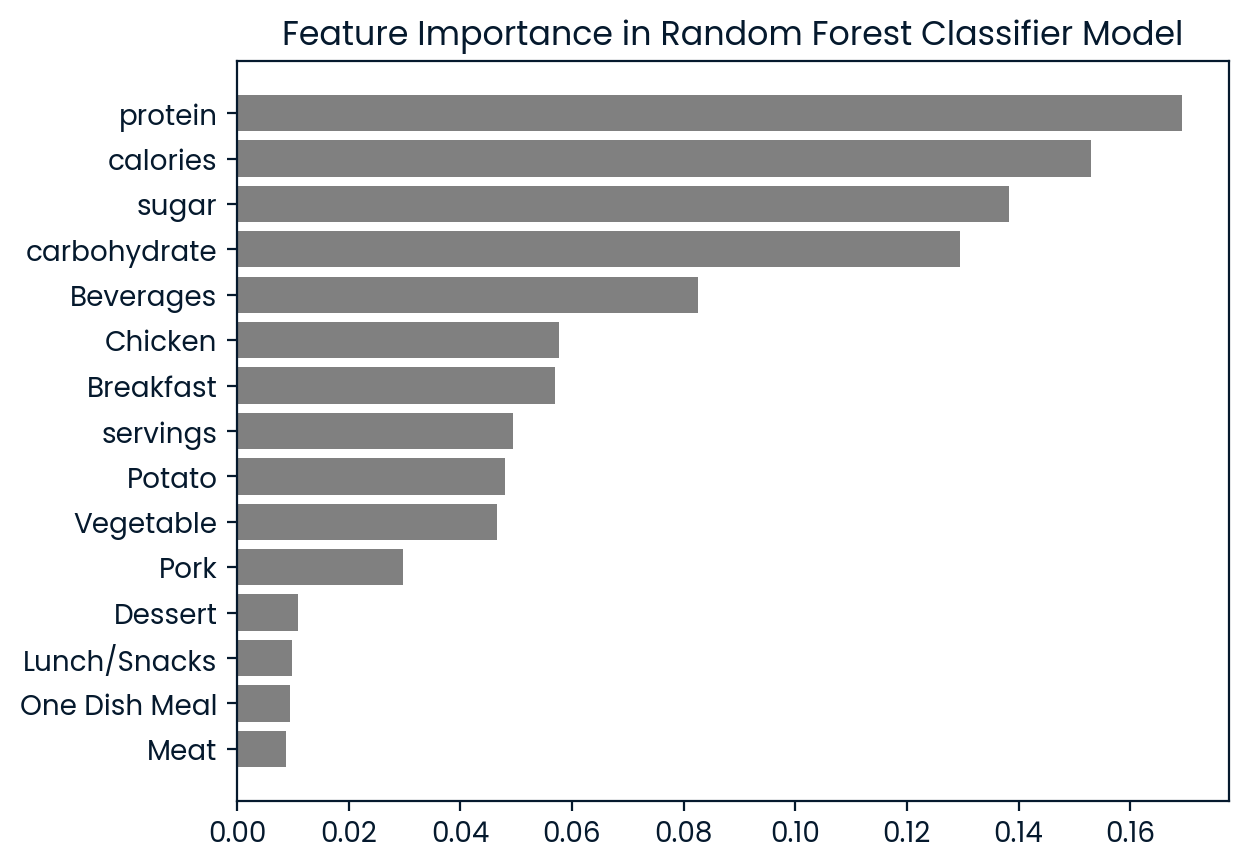

In [106]:
# Create a barplot to find the important feature in Random Forest Classifier Model.
feature_columns = X.columns.to_list()
feature_importances = rfc.feature_importances_
rfc_results = {}
for i in range(len(feature_columns)):
    rfc_results[feature_columns[i]] = feature_importances[i]

rfc_results = dict(sorted(rfc_results.items(), key=lambda item: item[1]))
plt.barh(list(rfc_results.keys()), list(rfc_results.values()), color='gray')
plt.title('Feature Importance in Random Forest Classifier Model')

### Results
The Precision, F1-Score, and ROC-AUC of the Logistic Regression model are 0.85, 0.81, and 0.87. On the other hand, the Precision, F1-Score, and ROC-AUC score of the Random Forest Classifier model is 0.81, 0.77, and 0.83. The results mean that the **Logistic Regression model fits the features better and has less error in predicting values.**

## Business Metrics
We have the following business goals:
1. Predict which recipes will lead to higher traffic
2. Correctly predict high traffic recipes 80% of the time

We find that traffic to the rest of the site goes up by as much as 40% if people were to pick the popular recipe. But, since we know that more traffic leads to more subscriptions, we would want to find the the popular recipe that leads to higher traffic on the site. In addition, we would need to correctly predict which recipes lead to high traffic 80% of the time. Therefore, we would consider using accuracy and precision as KPIs to compare the two models again. The higher the score, the better the model performs. The Logistic Regression model has the accuracy score of 78% and precision score of 85% whereas the Random Forest Classifier model has a lower accuracy score (73%) and lower precision score (81%). In addition, the Logistic Regression model achieves both business goals since its Precision, F1-Score, and ROC-AUC scores are more than or equal to 80%.

Text(0, 0.5, 'Accuracy')

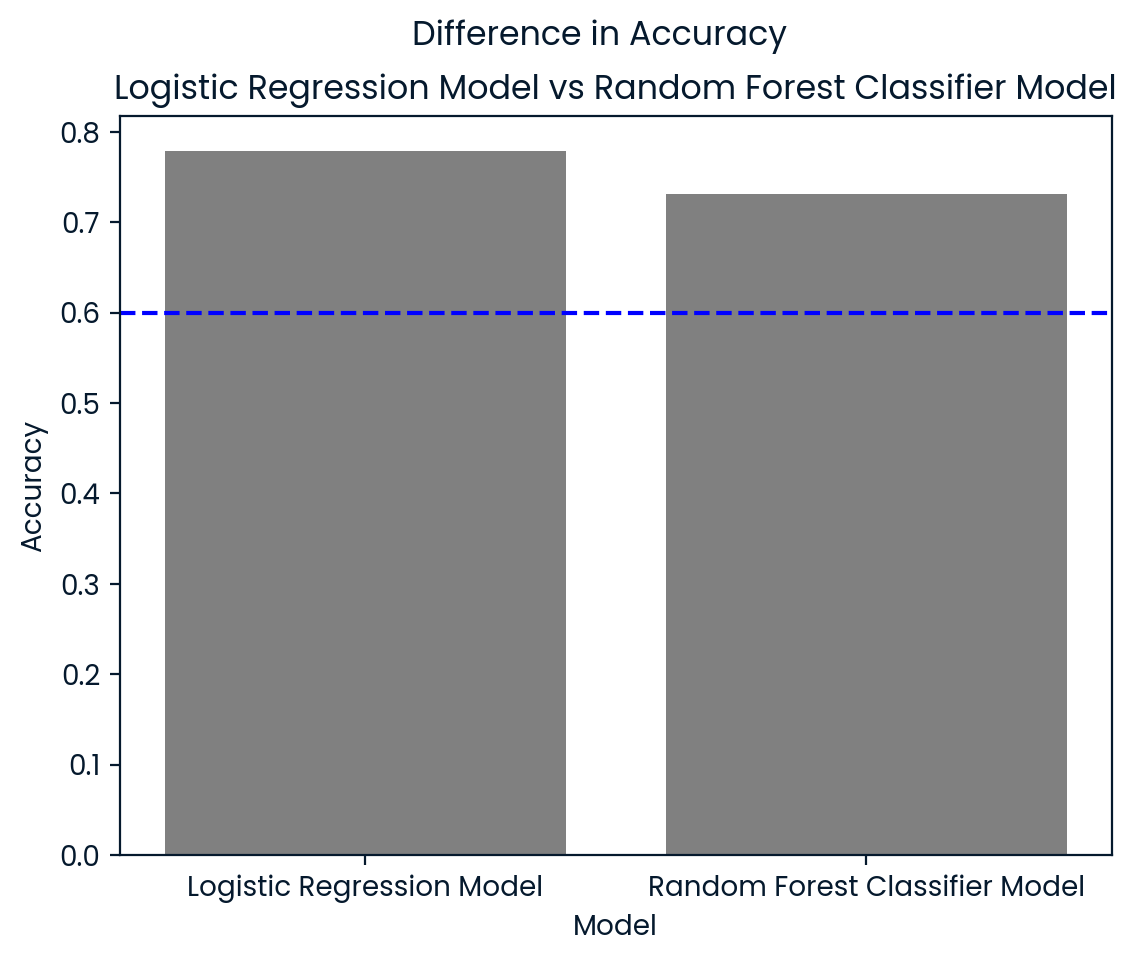

In [107]:
# Create a barplot which shows the differences in accuracy between the models
accuracy_scores = [logreg_accuracy_score, rfc_accuracy_score]
accuracy_model_labels =['Logistic Regression Model', 'Random Forest Classifier Model']
plt.bar(accuracy_model_labels, accuracy_scores, color='gray')
plt.axhline(y=0.6, color='blue', linestyle='--', label='60% accuracy')
plt.title('Logistic Regression Model vs Random Forest Classifier Model')
plt.suptitle('Difference in Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

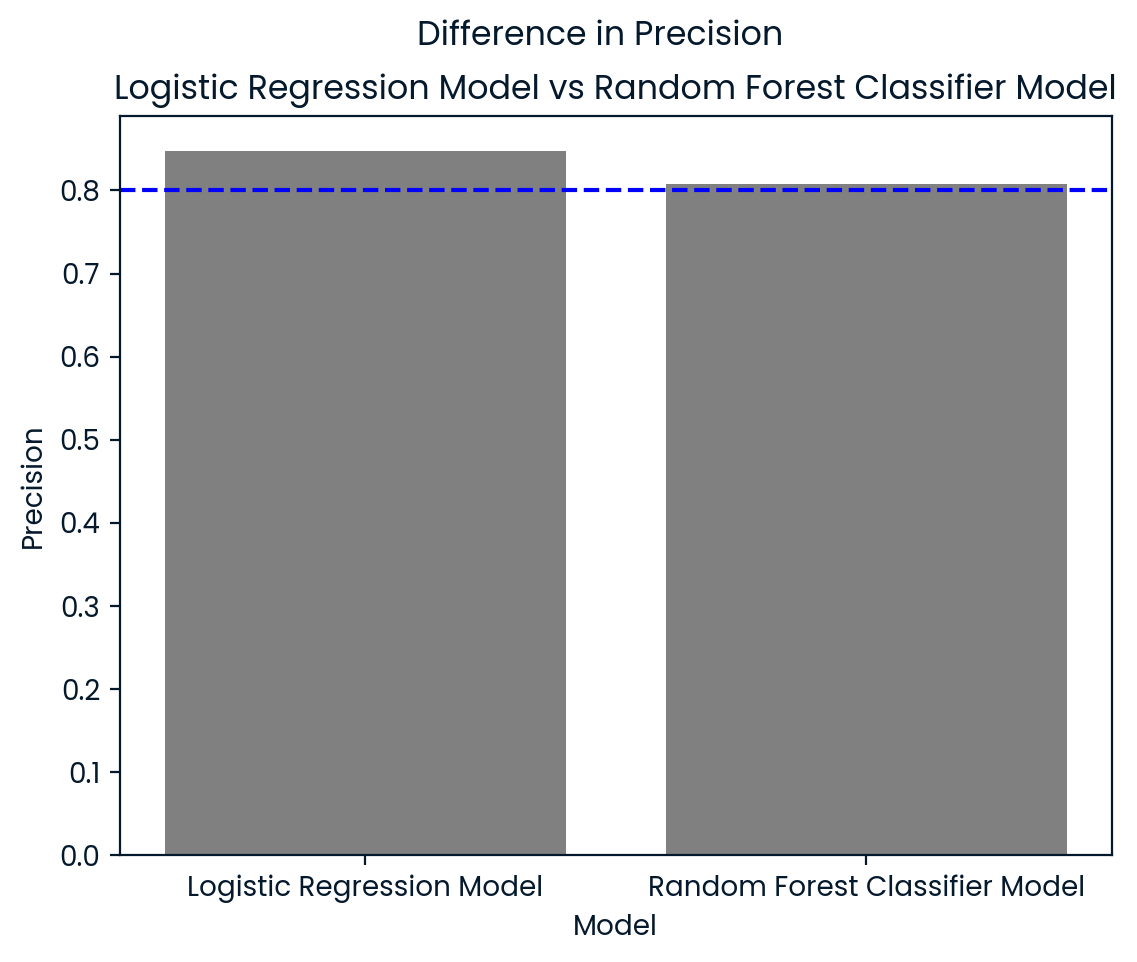

In [108]:
# Create a barplot which shows the differences in precision between the models
precision_scores = [logreg_precision_score, rfc_precision_score]
precision_model_labels =['Logistic Regression Model', 'Random Forest Classifier Model']
plt.bar(precision_model_labels, precision_scores, color='gray')
plt.axhline(y=0.8, color='blue', linestyle='--', label='80% precision')
plt.title('Logistic Regression Model vs Random Forest Classifier Model')
plt.suptitle('Difference in Precision')
plt.xlabel('Model')
plt.ylabel('Precision')

## Final Summary
To help the product manager predict recipes with higher traffic, we can plan to deploy the **Logistic Regression model** into production. By implementing this model, about 85% of the predicted recipes will lead to higher traffic. This will help the product manager have more confidence in generating more traffic to the rest of the site and in finding the most popular recipe. I will recommend the following steps to ensure the model can be deployed and improved regularly.
1. Test the model for recent recipes and compare its performance with newly hired data analysts to gather real-world feedback and enhance the model's performance. Additionally, keep the model up to date with the latest data based on the user preferences over time. 
2. Identify and fix errors such as missing values and invalid values to improve accuracy of the model after testing. Additionally, collect more data on factors such as time to make recipes, cost per servings, details on ingredients, duration of visits to recipe pages (how long users spend on recipe pages they visited), incoming links (from where the traffic to recipe pages come from) and combinations of recipes visited in the same session.
3. Explore optimal deployment strategies for the model in terms of performance and cost. Consider deploying the model on Edge devices for improved convenience and security.
4. Continuously improve the model by collecting more additional data even for recipes with low traffic, using feature engineering by creating new meaningful features out of existing variables and increasing the number of categories in the dataset, and finding the best fine-tuning parameters for improving the model's predictive capabilities. This would be key points to address the imbalance between low-traffic recipes and high-traffic recipes.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation